<a href="https://colab.research.google.com/github/fishitmo/Machine-Learning-and-Data-Science-Projects/blob/main/Students_Performance_in_Exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Purpose of Document/Introduction**

The Purpose of this document is to analyse a dataset by the name of Students Performance in Exams and provide a best fit model output. The dataset being analysed was taken from https://www.kaggle.com/spscientist/students-performance-in-exams.

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "whitegrid", context = "notebook")

In [3]:
# Import dataset
import io
from google.colab import files
uploaded = files.upload() # C:\Users\werka\OneDrive\Documents\Machine_Learning_and_DataScience_Collection\Students Performance in Exams

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [4]:
filename = next(iter(uploaded))

In [6]:
df = pd.read_csv(filename)

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

#**Data Preprocessing**

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
# Find Duplicates

duplicate_rows = df[df.duplicated()]

print(f"Duplicate rows: {duplicate_rows}")

Duplicate rows: Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


In [13]:
# removes duplicate rows from the DataFrame df
df.drop_duplicates(inplace= True)

# resets the index of the DataFrame df
df.reset_index(drop= True, inplace= True)

In [15]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#**Data Balancing**

We have to check if our predicator varaible is balnced, otherwise that could induce a bias in our results.

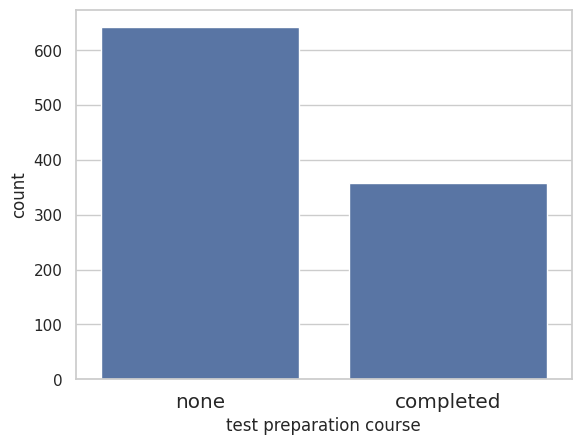

In [21]:
sns.countplot(data= df , x= "test preparation course")
plt.xticks(horizontalalignment= 'center', fontweight = 'light', fontsize= 'large')
plt.show()

In [23]:
columns = ["none", "completed"]
df["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

We will balance the data by taking the minimum  of both possibel values

https://www.kaggle.com/code/ronnycaprilesm/principles-decision-trees-and-random-forest

https://rpubs.com/vroylon/619662